In [1]:
import pandas as pd
import nltk
from nltk import tokenize as tk
from nltk import FreqDist
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
import string
from collections import Counter
# use pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
# Run once
# nltk.download('punkt')
# nltk.download('stopwords')

In [3]:
oly = pd.read_csv('olympics_twitter.csv', encoding = 'utf-8')
oly.columns

Index(['Date', 'Title', 'Url', 'Language', 'Author', 'Avatar',
       'Category Details', 'Checked', 'City', 'Display URLs', 'Expanded URLs',
       'Full Name', 'Full Text', 'Gender', 'Hashtags', 'Impact', 'Impressions',
       'Latitude', 'Location Name', 'Longitude', 'Media Filter', 'Media URLs',
       'Mentioned Authors', 'Original Url', 'Thread Author',
       'Thread Created Date', 'Thread Entry Type', 'Thread Id', 'Thread URL',
       'Twitter Author ID', 'Twitter Channel Role', 'Twitter Followers',
       'Twitter Following', 'Twitter Reply Count', 'Twitter Reply to',
       'Twitter Retweet of', 'Twitter Retweets', 'Twitter Tweets',
       'Twitter Verified', 'Updated', 'Reach (new)'],
      dtype='object')

In [4]:
oly[['Author', 'Language']].groupby(['Language']).count()

,Author
Language,
ar,2
cs,1
cy,1
de,27
en,143
es,16
id,1
it,2
ja,1


In [5]:
oly['Language'].iloc[0]

'en'

In [6]:
oly_en = oly[oly['Language'] == 'en']
oly_en.shape

(143, 41)

In [7]:
oly_en['Full Text'].iloc[0]

"@TeamUSA Literally all of the 2012 Olympics for women's artistic gymnastics"

In [8]:
oly_en['Full Text'].iloc[0].lower()

"@teamusa literally all of the 2012 olympics for women's artistic gymnastics"

In [9]:
tk.word_tokenize(oly_en['Full Text'].iloc[0].lower())

['@',
 'teamusa',
 'literally',
 'all',
 'of',
 'the',
 '2012',
 'olympics',
 'for',
 'women',
 "'s",
 'artistic',
 'gymnastics']

In [10]:
tk.sent_tokenize(oly_en['Full Text'].iloc[0].lower())

["@teamusa literally all of the 2012 olympics for women's artistic gymnastics"]

In [11]:
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
text_lower = [x.lower() for x in oly_en['Full Text']]
tokens = [tk.word_tokenize(x) for x in text_lower]
filtered = []
for i in tokens:
    filtered.append([word for word in i if word not in stopwords.words('english')])

In [13]:
filtered[0]

['@',
 'teamusa',
 'literally',
 '2012',
 'olympics',
 'women',
 "'s",
 'artistic',
 'gymnastics']

In [14]:
freq1 = [FreqDist(x) for x in filtered]
f1_counts = [Counter(x) for x in freq1]
wordcounts = Counter()
for i in f1_counts:
    wordcounts += i

In [15]:
counts = pd.DataFrame.from_dict(dict(wordcounts), orient='index').sort_values(0, ascending = False)
counts.head(10)

,0
@,420
.,82
!,75
teamusa,64
#,62
:,55
https,41
",",27
uswnt,22
?,12


In [16]:
analyser = SentimentIntensityAnalyzer()

In [17]:
print(oly_en['Full Text'].iloc[2])
print(analyser.polarity_scores(oly_en['Full Text'].iloc[2]))

"To be blunt, it started women's basketball in this country. It gave it the notoriety it deserved." -@s10bird We close #WomensHistoryMonth by celebrating the team that started a DYNASTY: The 1996 women of @usabasketball. https://t.co/TI5wWOtjtP
{'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.5719}


In [18]:
sentiments = [analyser.polarity_scores(x) for x in oly_en['Full Text']]
sentiments[0:10]

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.902, 'pos': 0.098, 'compound': 0.5719},
 {'neg': 0.0, 'neu': 0.625, 'pos': 0.375, 'compound': 0.6369},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.752, 'pos': 0.248, 'compound': 0.9477},
 {'neg': 0.042, 'neu': 0.958, 'pos': 0.0, 'compound': -0.0772},
 {'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6239},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.815, 'pos': 0.185, 'compound': 0.3612}]

In [19]:
sentiments_df = pd.DataFrame(sentiments)
sentiments_df.head()

,neg,neu,pos,compound
0,0.0,1.000,0.000,0.0000
1,0.0,1.000,0.000,0.0000
2,0.0,0.902,0.098,0.5719
3,0.0,0.625,0.375,0.6369
4,0.0,1.000,0.000,0.0000


In [20]:
sentiments_df['pos'].describe()

count    143.000000
mean       0.170343
std        0.171924
min        0.000000
25%        0.000000
50%        0.143000
75%        0.291500
max        0.594000
Name: pos, dtype: float64

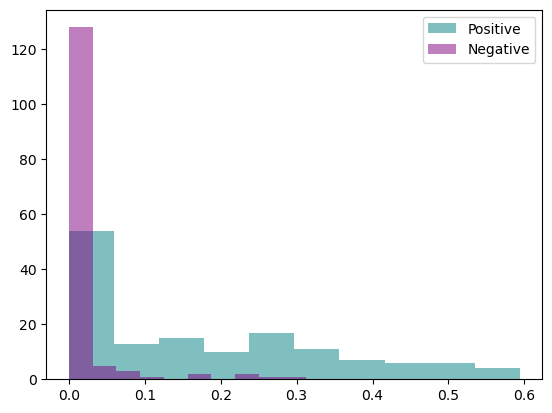

In [21]:
fig0, ax0 = plt.subplots()
ax0.hist(sentiments_df['pos'], alpha = 0.5, color = 'teal', label = 'Positive')
ax0.hist(sentiments_df['neg'], alpha = 0.5, color = 'purple', label = 'Negative')
ax0.legend()
plt.show()